In [1]:
import os ,sys 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from operator import itemgetter
from sklearn.preprocessing import StandardScaler
import numpy as np 

# os.chdir("/home/didier/Documents/BARRADD_Things/ML_CONSRANK/")

np.random.seed(101)

PDB_CASES = [
"1A2K","1ACB","1AHW","1AK4","1AKJ","1ATN","1AVX",
"1AY7","1AZS","1B6C","1BJ1","1BKD","1BUH","1BVK",
"1BVN","1CGI","1CLV","1D6R","1DE4","1DFJ","1DQJ","1E4K","1E6E",
"1E6J","1E96","1EAW","1EER","1EFN","1EWY","1EXB",
"1F34","1F51","1FAK","1FC2","1FCC","1FFW","1FLE","1FQ1",
"1FQJ","1FSK","1GCQ","1GHQ","1GL1","1GLA","1GP2",
"1GPW","1GRN","1GXD","1H9D","1HCF","1HE1","1HE8","1HIA","1I2M",
"1I4D","1I9R","1IJK","1IQD","1J2J","1JIW","1JK9","1JPS","1JTD",
"1JTG","1JWH","1JZD","1K4C","1K5D","1K74","1KAC",
"1KKL","1KLU","1KTZ","1KXP","1KXQ","1LFD","1M27","1MAH","1ML0",
"1MLC","1MQ8","1N2C","1NCA","1NSN","1NW9","1OC0",
"1OFU","1OPH","1OYV","1PPE","1PVH","1QA9","1QFW",
"1R0R","1R6Q","1R8S","1RKE","1RLB","1RV6",
"1S1Q","1SYX","1T6B","1TMQ","1UDI","1US7","1VFB",
"1WDW","1WEJ","1WQ1","1XD3","1XQS","1XU1","1YVB",
"1Z0K","1Z5Y","1ZHH","1ZHI","1ZM4","2A1A","2A5T",
"2A9K","2ABZ","2AJF","2AYO","2B42","2B4J","2BTF","2C0L","2CFH",
"2FD6","2FJU","2G77","2GAF","2GTP","2H7V","2HLE",
"2HMI","2HQS","2HRK","2I25","2I9B","2IDO","2J0T",
"2J7P","2JEL","2MTA","2NZ8","2O3B","2O8V","2OOB",
"2OOR","2OT3","2OUL","2OZA","2PCC","2SIC",
"2SNI","2UUY","2VDB","2VXT","2W9E","2X9A","2YVJ",
"2Z0E","3A4S","3AAA","3AAD","3BIW","3BP8","3BX7",
"3CPH","3D5S","3DAW","3EO1","3EOA","3F1P",
"3FN1","3G6D","3H11","3H2V","3HI6","3HMX","3K75",
"3L5W","3LVK","3MXW","3P57","3PC8","3R9A","3RVW",
"3S9D","3SGQ","3SZK","3V6Z","3VLB","4CPA","4DN4",
"4FQI","4FZA","4G6J","4G6M","4H03","4HX3","4IZ7",
"4JCV","4LW4","4M76","7CEI","9QFW","BAAD","BOYV","BP57","CP57"
]


PDB_BM5 = [
'1EXB','1JTD','1M27','1RKE','2A1A','2GAF','2GTP','2VXT','2W9E',
'2X9A','2YVJ','3A4S','3AAA','BAAD','3AAD','3BIW','3BX7',
'3DAW','3EO1','3EOA','3F1P','3FN1','3G6D','3H11',
'3H2V','3HI6','3HMX','3K75','3L5W','3L89','3LVK','3MXW',
'BP57','CP57','3P57','3PC8','3R9A','3RVW','3S9D','3SZK',
'3V6Z','3VLB','4DN4','4FQI','4FZA','4G6J','4G6M','4GAM',
'4GXU','4H03','4HX3','4IZ7','4JCV','4LW4','4M76'
]



In [2]:
all_balanced_data = pd.read_csv("data/Clean_dataframe_balanced_all_data_ccharppi_4_march_2020_complete.csv")

In [3]:
for m in all_balanced_data.columns:
    print (m, end = " ")

AA AA_sqrt AAl AAl_sqrt AAr AAr_sqrt ALIPH AP_ACE AP_DARS AP_DCOMPLEX AP_DDG_U AP_DDG_W AP_DFIRE2 AP_DOPE AP_DOPE_HR AP_GEOMETRIC AP_GOAP_ALL AP_GOAP_DF AP_GOAP_G AP_MPS AP_OPUS_PSP AP_PISA AP_T1 AP_T2 AP_URS AP_W1 AP_calRW AP_calRWp AP_dDFIRE AlAl AlAl_sqrt AlAr AlAr_sqrt ArAr ArAr_sqrt BSA BSA_Apolar BSA_Polar CA CA_sqrt CAl CAl_sqrt CAr CAr_sqrt CC CC_sqrt CONSRANK_val CP CP_BFKV CP_BL CP_BT CP_D1 CP_DDG_U CP_DDG_W CP_E3DC_CB CP_E3DC_MIN CP_E3D_CB CP_E3D_MIN CP_ELOCAL_CB CP_ELOCAL_MIN CP_EPAIR_CB CP_EPAIR_MIN CP_ES3DC_CB CP_ES3DC_MIN CP_GKS CP_HLPL CP_MJ1 CP_MJ2 CP_MJ2h CP_MJ3h CP_MJPL CP_MS CP_MSBM CP_Qa CP_Qm CP_Qp CP_RMFCA CP_RMFCEN1 CP_RMFCEN2 CP_RO CP_SJKG CP_SKOIP CP_SKOa CP_SKOb CP_TB CP_TD CP_TEl CP_TEs CP_TS CP_TSC CP_VD CP_Z3DC_CB CP_Z3DC_MIN CP_ZLOCAL_CB CP_ZLOCAL_MIN CP_ZPAIR_CB CP_ZPAIR_MIN CP_ZS3DC_CB CP_ZS3DC_MIN CP_sqrt Conf DDG_V DESOLV DOKB DQ_val ELE FIREDOCK FIREDOCK_AB FIREDOCK_EI HBOND INSIDE NSC Nis_Apolar Nis_Polar ODA PA PA_sqrt PAl PAl_sqrt PAr PAr_sqrt PI_

In [4]:
all_balanced_data.set_index('Conf',inplace=True)
all_balanced_data.rename(columns={'NIS Polar' :'NiS_Polar',
                                  'Nis Apolar':'Nis_Apolar',
                                  'BSA Apolar':'BSA_Apolar',
                                  'BSA Polar' :'BSA_Polar'},inplace=True)
all_balanced_data.loc["Z_1JTG_1136_M.pdb","DDG_V"]  = all_balanced_data["DDG_V"].mean()

In [5]:
feat_object = ['idx','class_q','label_binary','DQ_val']

In [6]:
target_classifiers = ['CONSRANK_val', 'CP_HLPL', 'CP_MJ3h', 'DDG_V', 'CP_RMFCA', 
                     'AP_GOAP_DF', 'CP_Qp', 'CP_TD', 'CP_SKOIP', 'CP_TB', 'CP_TSC', 
                       'PYDOCK_TOT', 'SIPPER', 'CP_BT','CP_MJ2h','AP_DFIRE2','CP_RMFCEN1',
                       'AP_DARS','AP_PISA','BSA_Apolar','CP_BFKV','AP_dDFIRE','CP_RMFCEN2',
                       'CP_ZS3DC_MIN', 'AP_DDG_W','cips_AlAr','CP_MJPL','CP_SKOb',
                       'CP_TEl','CP_TS','PROPNSTS','AP_MPS','CP_D1','AlAr','ArAr','FIREDOCK',
                      'AP_DDG_U' ,'label_binary']

In [7]:
scaler = StandardScaler()
names = all_balanced_data.drop(feat_object,axis=1).columns
scaled_df = scaler.fit_transform(all_balanced_data.drop(feat_object,axis=1))
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df["label_binary"] = all_balanced_data["label_binary"].values

In [8]:
scaled_df.shape

(73684, 158)

In [ ]:
# target_classifiers[:-1]

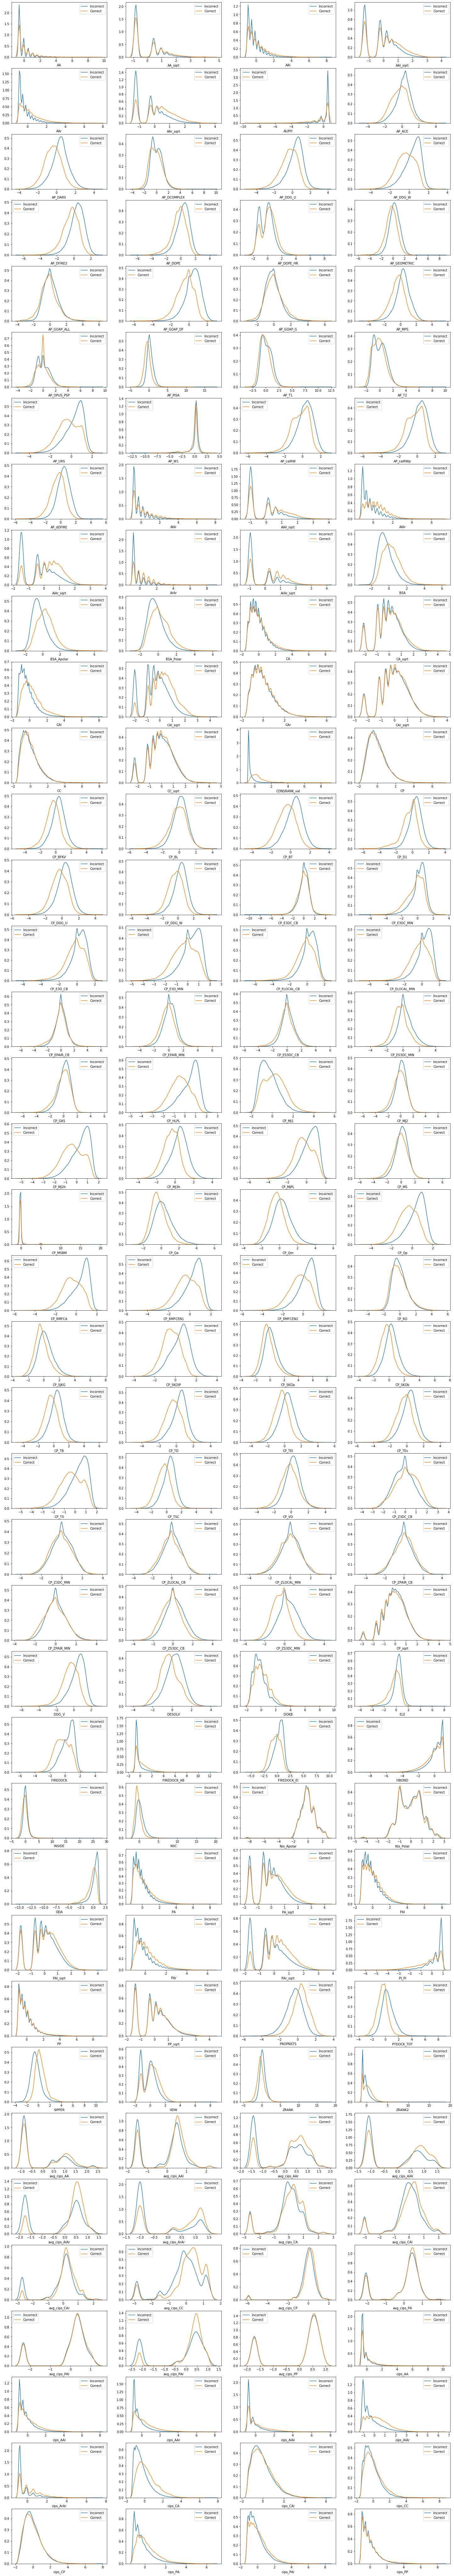

In [9]:
fig, axs = plt.subplots(39, 4)

my_axis = [(m,n) for m in range(39) for n in range(4)]

# scaled_df = scaled_df[ target_classifiers ]
for a ,c in zip(my_axis, names) : 
# for a ,c in zip(my_axis, target_classifiers[:-1]) :
    sns.distplot(a=scaled_df[scaled_df["label_binary"]== 0.0] [c] ,kde=True , hist=False, bins=40 ,ax= axs[a[0],a[1]], label="Incorrect")
    sns.distplot(a=scaled_df[scaled_df["label_binary"]== 1.0] [c] ,kde=True ,hist= False ,bins=40 ,ax= axs[a[0],a[1]],label="Correct" )
#     axs[a[0],a[1]].set_title('%s'%(c))
# hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "b"}
# hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "y"}
fig.set_figheight(150)
fig.set_figwidth(25)

In [27]:
len(target_classifiers)

38

In [12]:
scaled_df_2 = scaled_df[ target_classifiers ]

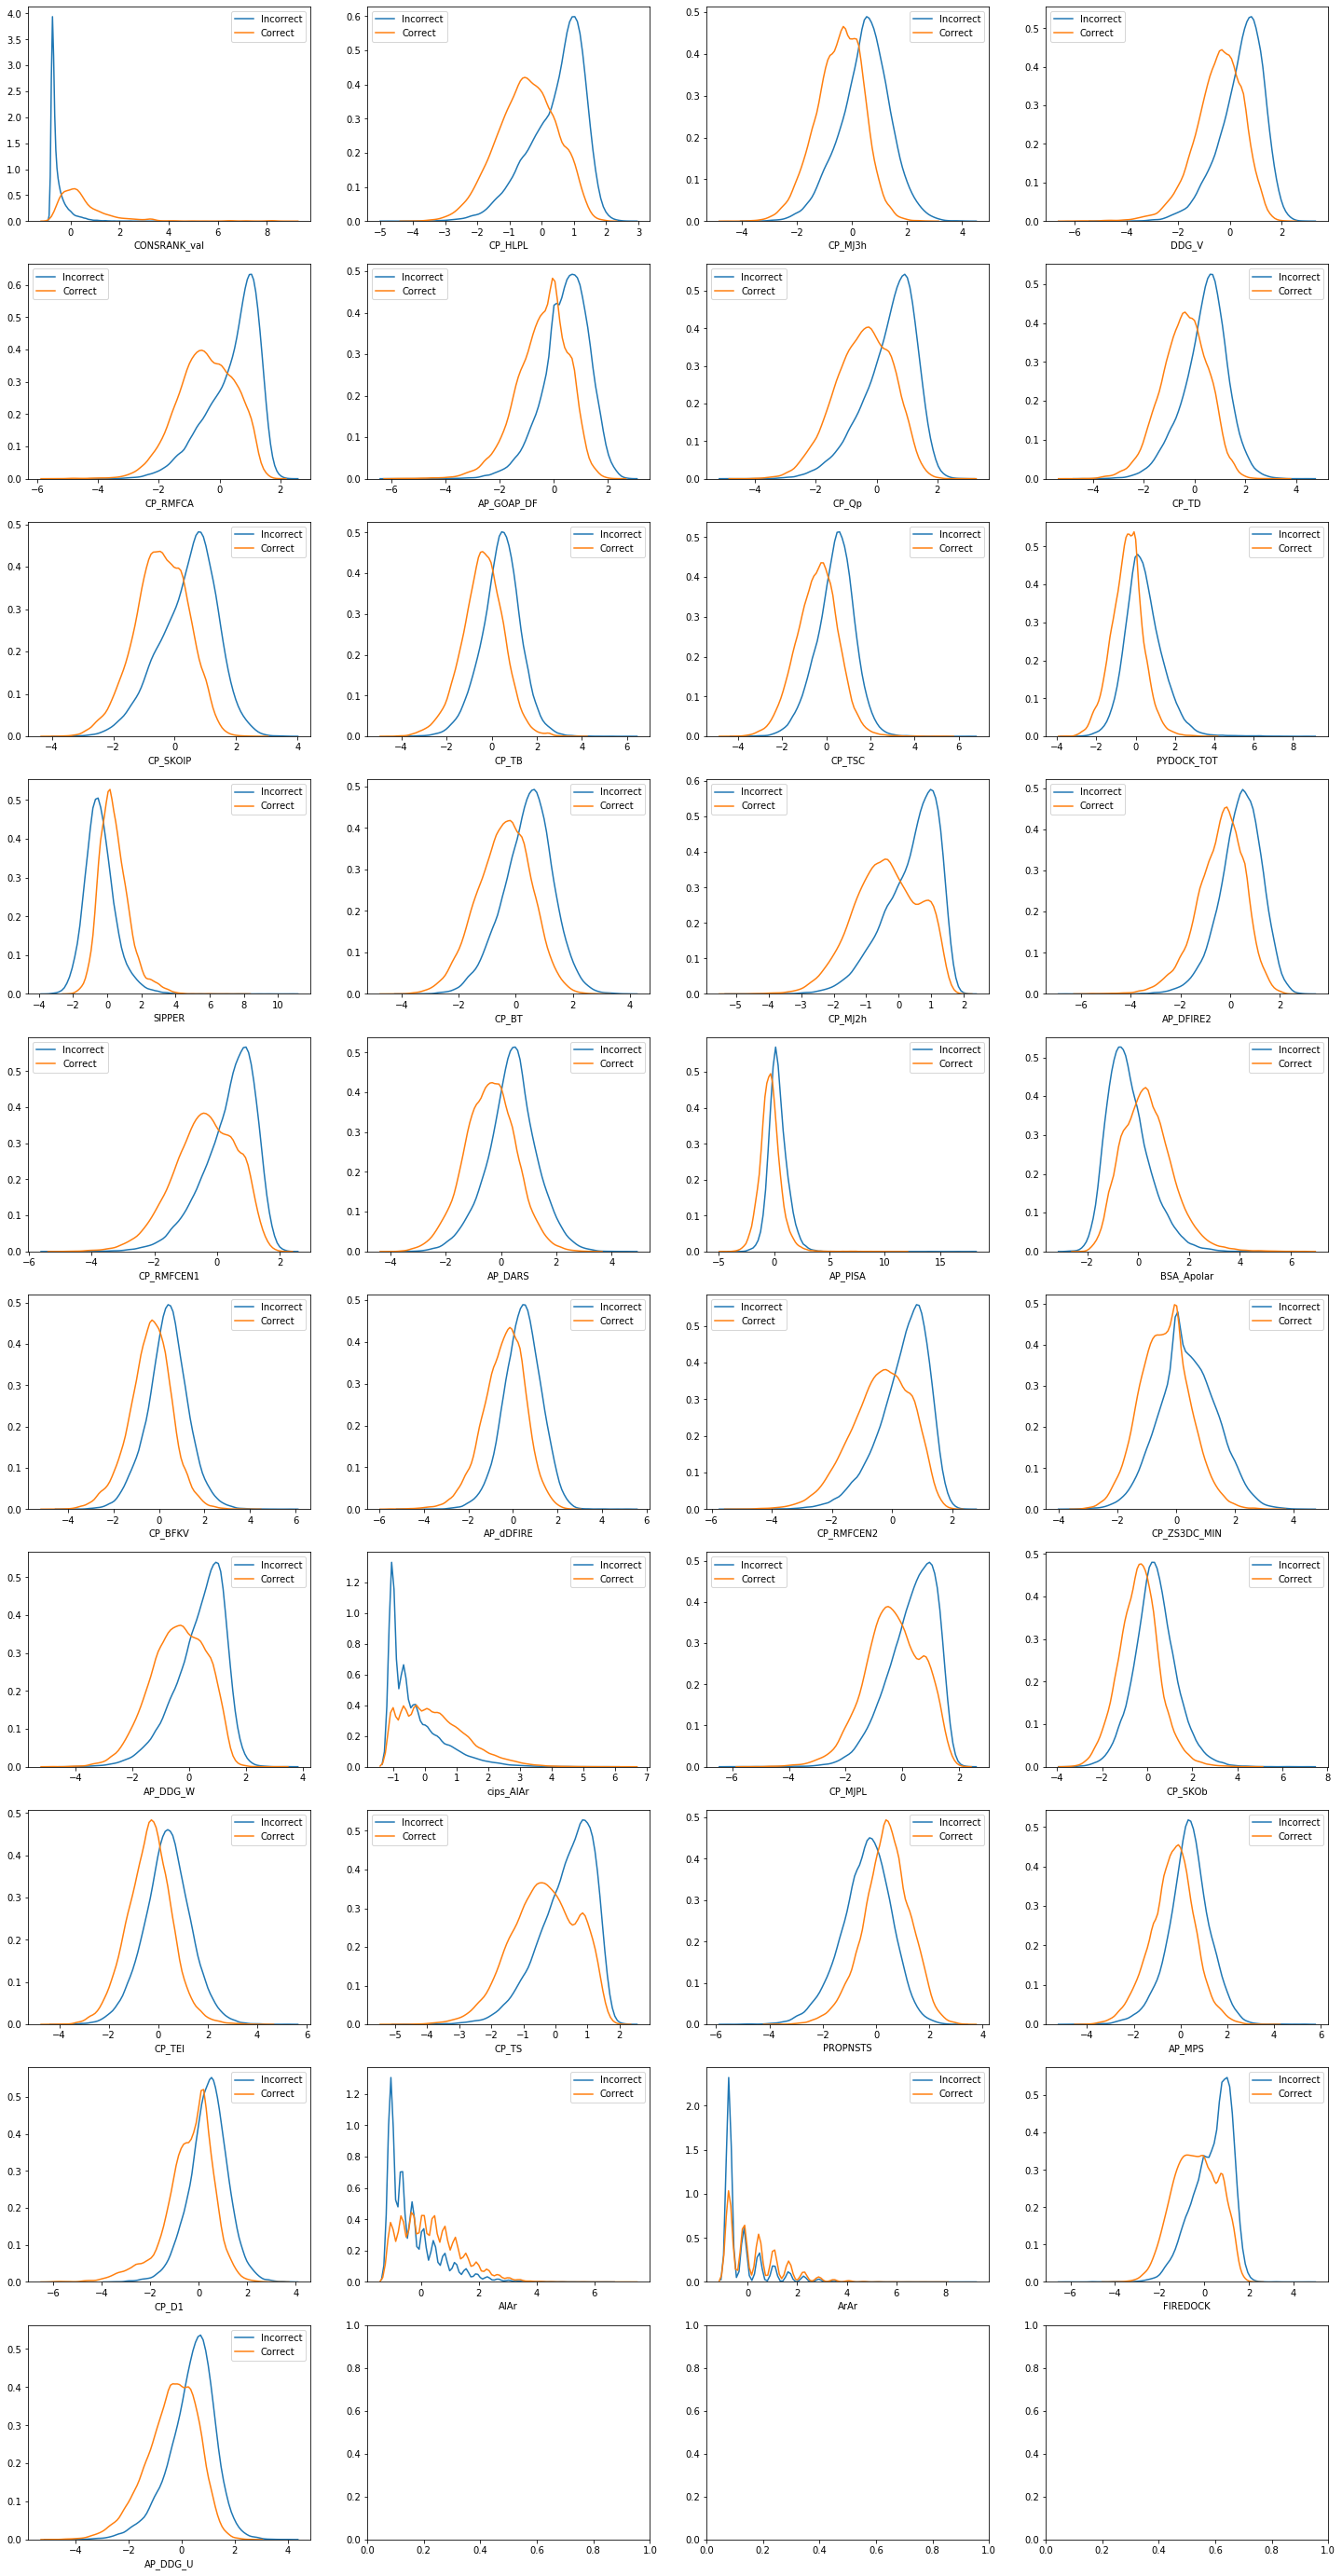

In [28]:
fig, axs = plt.subplots(10, 4)

my_axis = [(m,n) for m in range(10) for n in range(4)]

# scaled_df = scaled_df[ target_classifiers ]
# for a ,c in zip(my_axis, target_classifiers) : 
for a ,c in zip(my_axis, target_classifiers[:-1]) :
    sns.distplot(a=scaled_df_2[scaled_df_2["label_binary"]== 0.0] [c] ,kde=True , hist=False, bins=40 ,ax= axs[a[0],a[1]], label="Incorrect")
    sns.distplot(a=scaled_df_2[scaled_df_2["label_binary"]== 1.0] [c] ,kde=True ,hist= False ,bins=40 ,ax= axs[a[0],a[1]],label="Correct" )
#     axs[a[0],a[1]].set_title('%s'%(c))
# hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "b"}
# hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "y"}
fig.set_figheight(50)
fig.set_figwidth(25)